In [1]:
import os, coda
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#assign trace gas measurements to a 64 x 32 grid of lat/lon bins
latbins = np.linspace(-90, 90, 32)
lonbins = np.linspace(-180, 180, 64)
alldata = np.full(2, {'ir1_ch4':np.zeros((32,64)), 'ir3_co':np.zeros((32,64)), 'uv0_o3':np.zeros((32,64)),
                    'uv1_no2':np.zeros((32,64)), 'uv3_bro':np.zeros((32,64)), 'uv4_h2co':np.zeros((32,64)),
                    'uv5_so2':np.zeros((32,64)), 'uv6_oclo':np.zeros((32,64)), 'uv7_so2':np.zeros((32,64)),
                    'uv8_h2o':np.zeros((32,64)), 'uv9_chocho':np.zeros((32,64))})
for file in os.listdir('vcds_timeresolved'):
    for idx in range(2):
        if f'jul_{idx}' in file:
            data = np.loadtxt('vcds_timeresolved/'+file)
            gas = file.split('_')[0] + '_' + file.split('_')[1]
            latloncounts = np.zeros((32,64))
            print(file)
            for i in range(len(data[0])):
                latbin = np.argmin(np.abs(data[-2][i] - latbins))
                lonbin = np.argmin(np.abs(data[-1][i] - lonbins))
                latloncounts[latbin][lonbin] += 1
                alldata[idx][gas][latbin][lonbin] += data[0][i]
            latloncounts[np.where(latloncounts==0)] = 1
            alldata[idx][gas] /= latloncounts

ir1_ch4_jul_0.txt
ir1_ch4_jul_1.txt
ir3_co_jul_0.txt
ir3_co_jul_1.txt
uv0_o3_jul_0.txt
uv0_o3_jul_1.txt
uv1_no2_jul_0.txt
uv1_no2_jul_1.txt
uv3_bro_jul_0.txt
uv3_bro_jul_1.txt
uv4_h2co_jul_0.txt
uv4_h2co_jul_1.txt
uv5_so2_jul_0.txt
uv5_so2_jul_1.txt
uv6_oclo_jul_0.txt
uv6_oclo_jul_1.txt
uv7_so2_jul_0.txt
uv7_so2_jul_1.txt
uv8_h2o_jul_0.txt
uv8_h2o_jul_1.txt
uv9_chocho_jul_0.txt
uv9_chocho_jul_1.txt


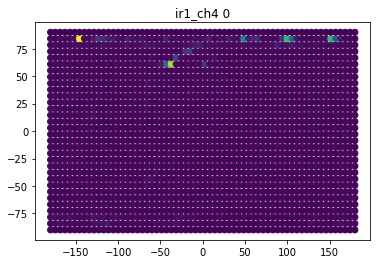

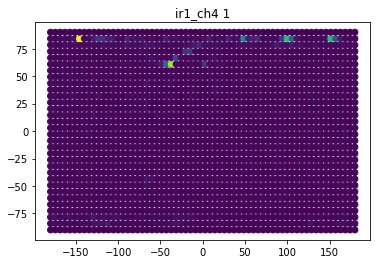

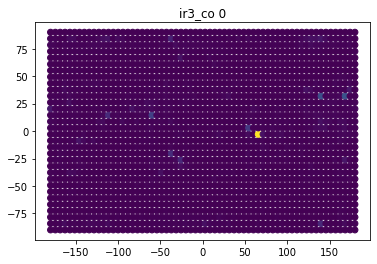

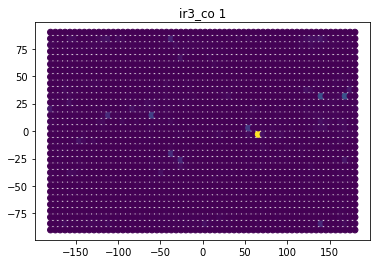

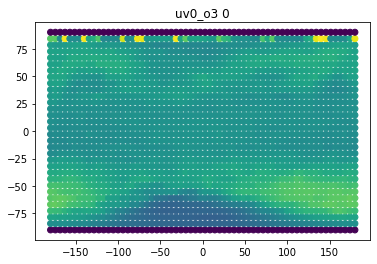

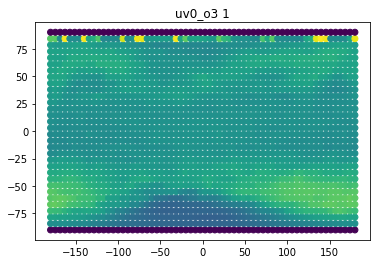

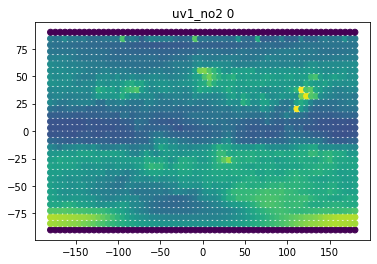

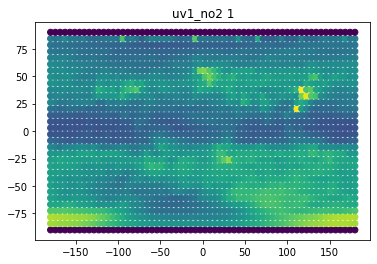

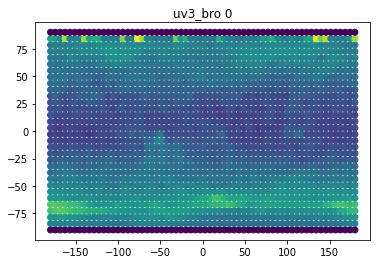

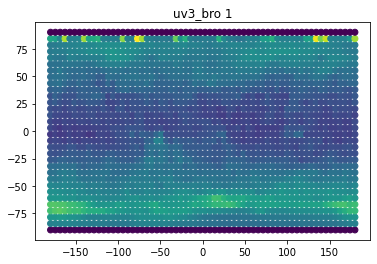

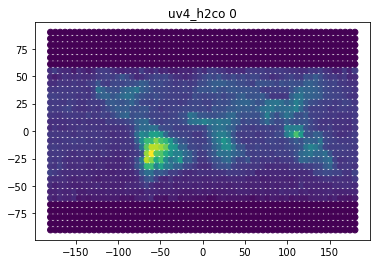

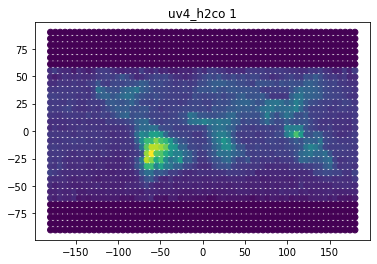

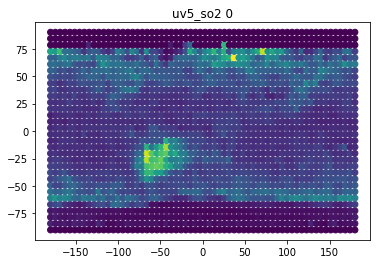

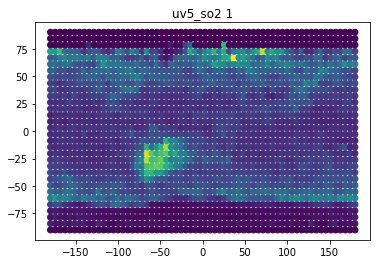

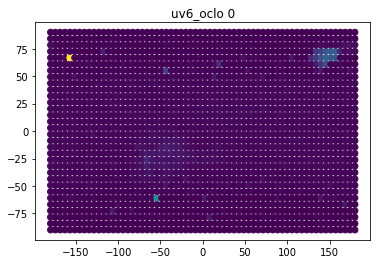

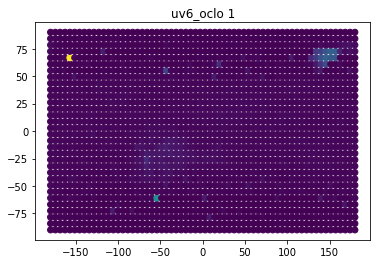

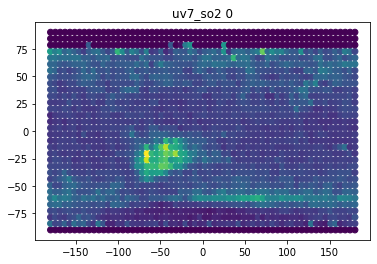

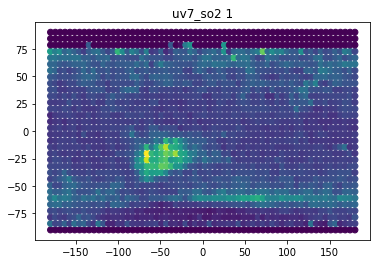

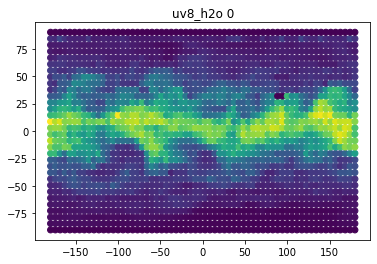

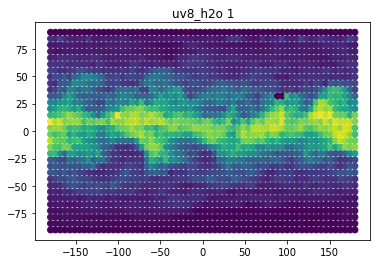

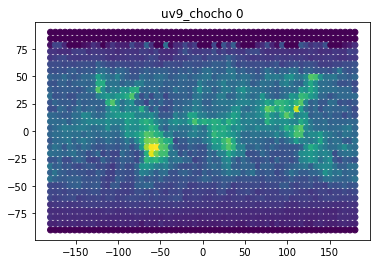

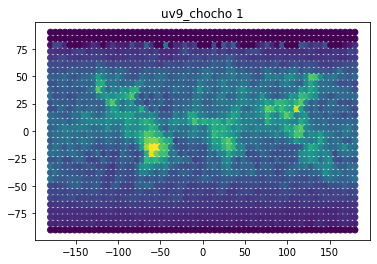

<Figure size 432x288 with 0 Axes>

In [4]:
#visualize binned trace gas maps
lat = np.repeat(np.linspace(-90, 90, 32), 64)
lon = np.tile(np.linspace(-180, 180, 64), 32)
for key in alldata[0].keys():
    for idx in range(2):
        gas = alldata[idx][key].flatten()
        plt.scatter(lon, lat, c=gas)
        plt.title(f'{key} {idx}')
        plt.show()
        plt.clf()

In [5]:
#consolidate all trace gas data into a lat-lon dataframe
import pandas as pd
df = pd.DataFrame(columns=list(alldata[0].keys()))
for idx in range(2):
    for lat in range(len(latbins)):
        for lon in range(len(lonbins)):
            latlondata = {}
            for key in alldata[idx].keys():
                latlondata[key] = alldata[idx][key][lat][lon]
            if set(latlondata.values()) != {0.0}: #ignore lat-lon bins which are all 0
                latlondata['lat'] = latbins[lat]
                latlondata['lon'] = lonbins[lon]
                df = df.append(latlondata, ignore_index=True)
df.head()

,ir1_ch4,ir3_co,uv0_o3,uv1_no2,uv3_bro,uv4_h2co,uv5_so2,uv6_oclo,uv7_so2,uv8_h2o,uv9_chocho,lat,lon
0,5.425039e+19,3.211164e+18,7.054886e+18,4.227632e+15,4.365710e+13,0.0,1.462157e+16,2.060746e+12,1.282357e+16,5.673241e+21,1.322057e+14,-84.193548,-180.000000
1,6.881695e+19,2.670330e+18,7.058566e+18,4.189459e+15,4.518685e+13,0.0,8.095885e+15,1.151600e+12,7.199569e+15,5.957503e+21,1.194938e+14,-84.193548,-174.285714
2,7.803696e+19,6.815621e+18,7.089679e+18,4.163942e+15,4.507188e+13,0.0,8.597137e+15,1.530128e+12,7.712632e+15,6.357969e+21,1.553873e+14,-84.193548,-168.571429
3,5.251828e+19,3.131384e+19,7.086988e+18,4.127218e+15,4.551447e+13,0.0,1.177495e+16,1.438339e+12,1.076519e+16,6.756437e+21,1.248701e+14,-84.193548,-162.857143
4,4.963557e+19,5.258167e+18,6.977883e+18,4.075370e+15,4.591719e+13,0.0,7.622498e+15,8.770862e+11,6.783972e+15,7.082974e+21,1.345362e+14,-84.193548,-157.142857


In [6]:
df.to_csv('jul.csv', index=False)

In [2]:
#now we can just follow the standard PCA procedure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = list(df.keys())
features.remove('lat')
features.remove('lon')
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                                                 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

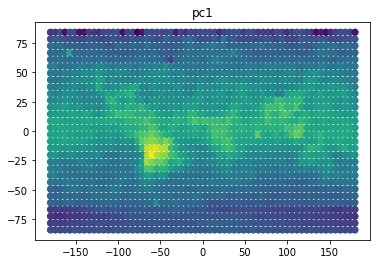

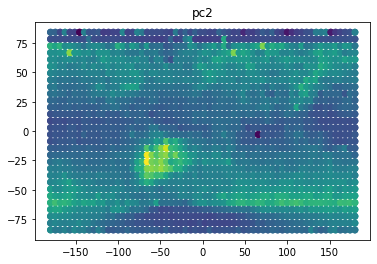

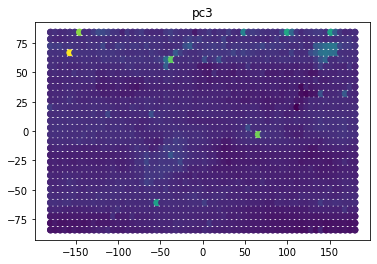

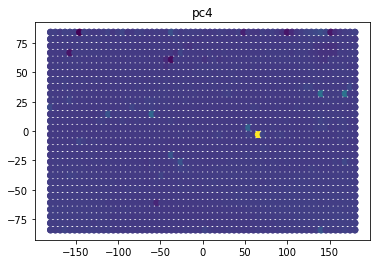

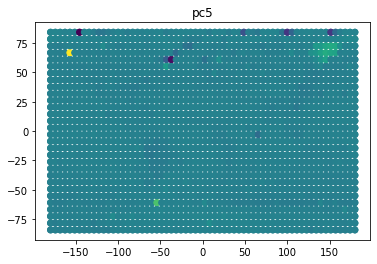

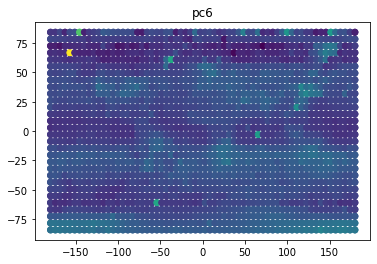

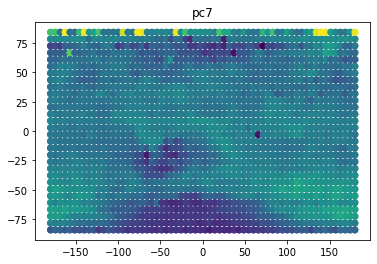

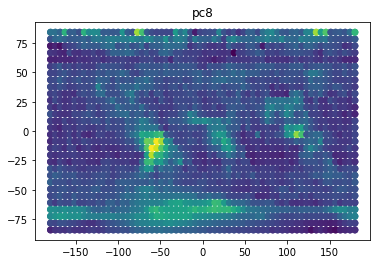

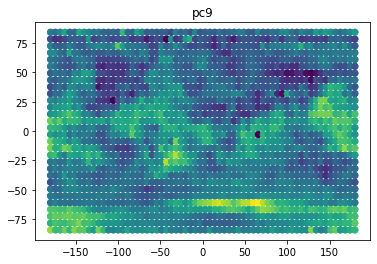

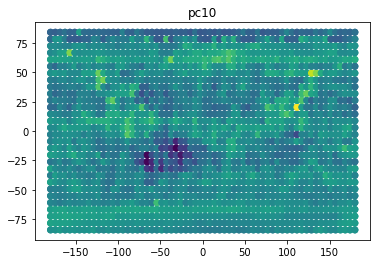

<Figure size 432x288 with 0 Axes>

In [3]:
for pc in principalDf.columns:
    plt.scatter(df['lon'], df['lat'], c=list(principalDf[pc]))
    plt.title(f'{pc}')
    plt.show()
    plt.clf()

Text(0, 0.5, 'Variance Fraction (%)')

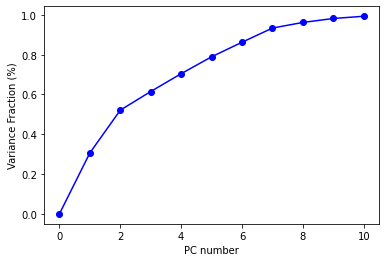

In [4]:
frac = []
for i in range(11):
    frac.append(np.sum(pca.explained_variance_ratio_[:i]))
plt.plot(frac, marker='o', color='b')
plt.xlabel('PC number')
plt.ylabel('Variance Fraction (%)')

In [5]:
pca.explained_variance_ratio_

array([0.30637787, 0.2148168 , 0.09366379, 0.08965372, 0.08487036,
       0.0730699 , 0.07128218, 0.02820202, 0.01977622, 0.01131506])